<a href="https://colab.research.google.com/github/LuccaFurtado/PDI/blob/main/PDI_Imagens_coloridas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A sensação visual de cor de um objeto é determinada pelo comprimento de onda que o mesmo reflete ao ser iluminado pela luz policromática(branca). Assim, temos a necessidade de representar as cores da forma mais fiel à realidade e levando em consideração todo esse processo. As imagens em níveis de cinza são compostas pela sua intensidade, que representa o nível de cinza compreendido entre o preto(nível de intensidade=0) e o branco(nível de intensidade máximo, 255 para imagens com resolução de 8 bits), a descrição apenas pelo nível de intensidade não é suficiente para representar as cores em imagens.





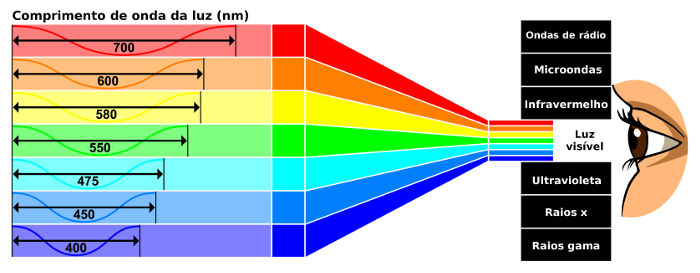

O sistema visual humano é composto por cones e bastonetes, onde os cones são os sensores responsáveis pela sensação da cor. Esses são divididos em cones sensíveis às luzes vermelha, verde e azul. Daí surge a representação RGB para cores e consequentemente para imagens coloridas: através da composição dessas 3 cores, conhecidas como cores primárias, outras cores podem ser formadas. Vale lembrar que a composição de toda e qualquer cor não pode ser feita apenas com a alteração da intensidade desses componentes, mas também do comprimento de onda.
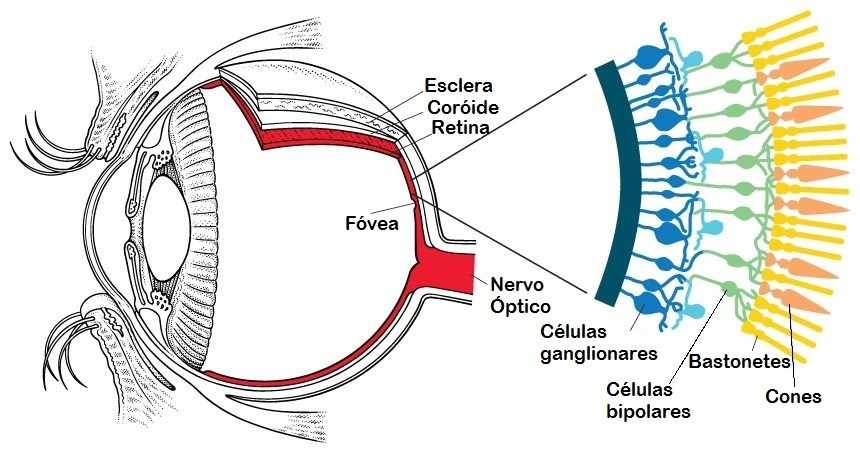

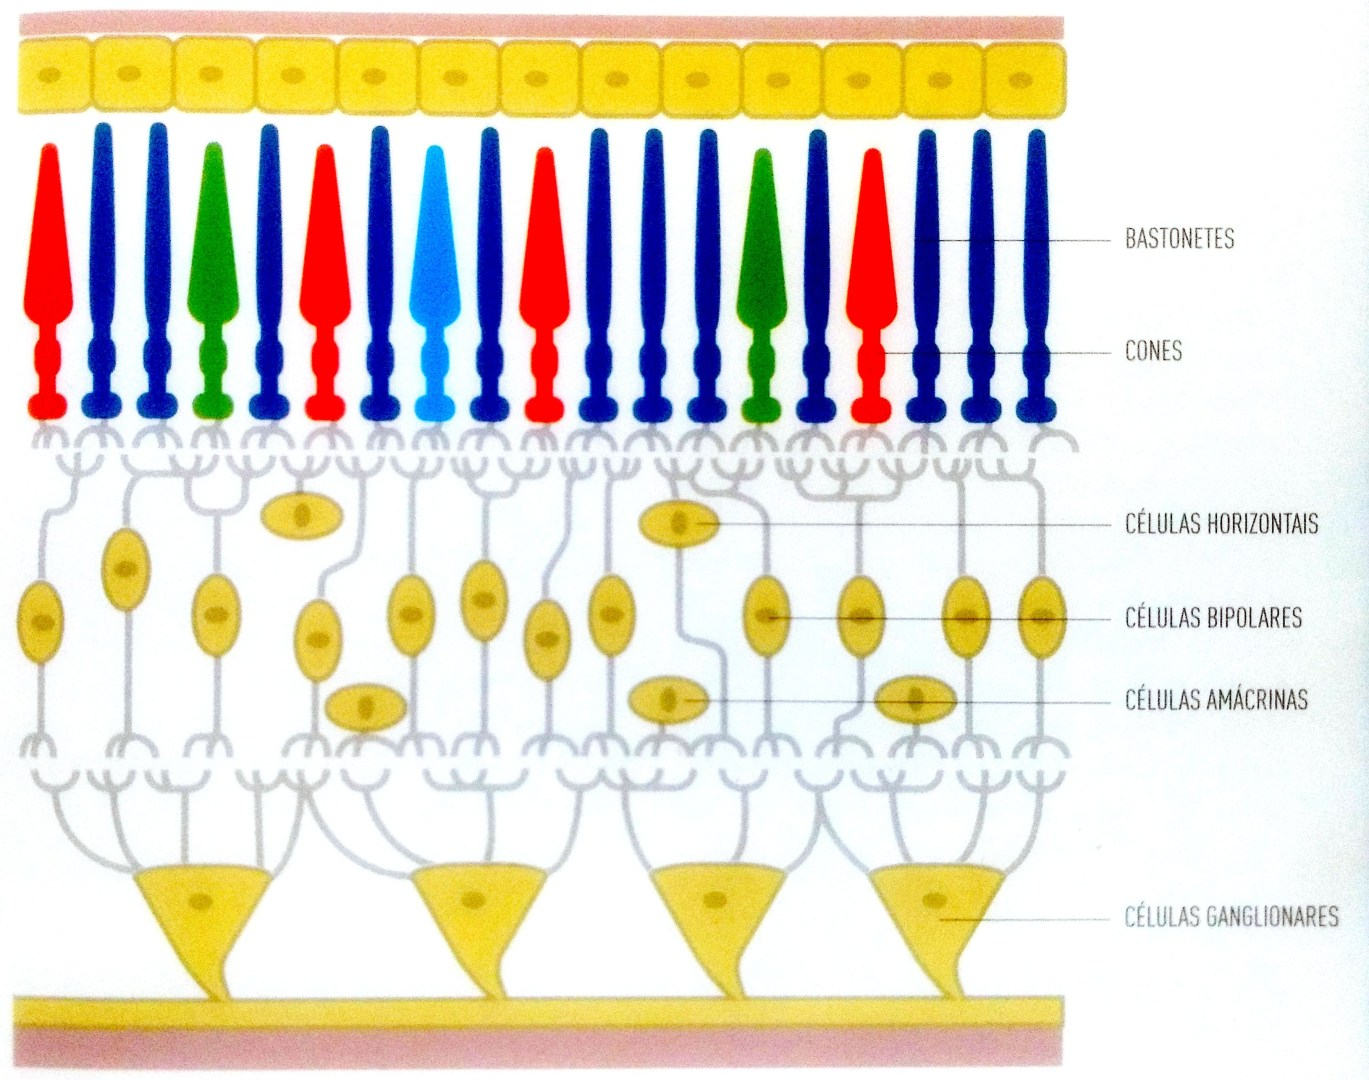

Também podemos diferenciar as cores através do brilho e cromaticidade, composta por matiz e saturação. A matiz corresponde ao comprimento de onda dominante na mistura de ondas de luz, representando a cor dominante, como o vermelho, azul, laranja e etc.. Já a saturação corresponde ao nível de pureza ou a quantidade de luz branca presente na matiz, quanto maior a saturação menos luz branca na composição da cor, as cores puras, como azul, vermelho e verde são totalmente saturadas. Podemos analisar a cromaticidade pelo diagrama de cromaticidade:

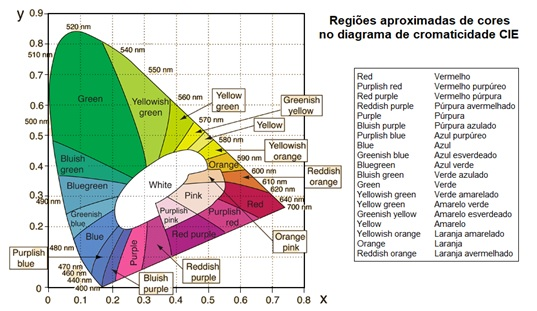

Nesse diagrama temos a composição das cores como uma relação entre x e y, representando os coeficientes tricromáticos do vermelho e do verde, respectivamente. Como a soma dos coeficientes tricromáticos é 1, temos para o coeficiente tricromático do azul, z= 1-x-y.


Assim, de acordo com o que foi visto, as imagens coloridas podem ser representadas por 3 canais, um canal para o vermelho, outro pra o verde e o último para o azul. Podemos realizar operações individuais em cada um desses canais alterando a imagem. Segue código usando a biblioteca OpenCV para melhor compreensão da representação das imagens em RGB

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import PIL

Começaremos lendo e plotando a imagem rgb:

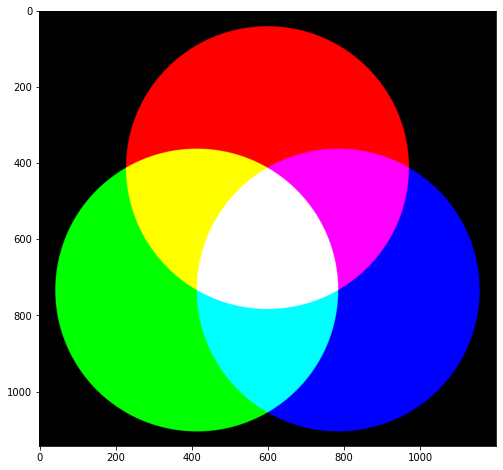

In [ ]:
img_cv=cv.imread("rgb.png")
b,g,r=cv.split(img_cv)
rgb_img = cv.merge([r,g,b])
plt.figure(figsize=(15,8))
plt.imshow(rgb_img)

Agora vamos análisar a composição dessa imagem nos 3 canais, temos as 3 cores primárias bem definidas na imagem e ao separarmos os canais temos o seguinte resultado:

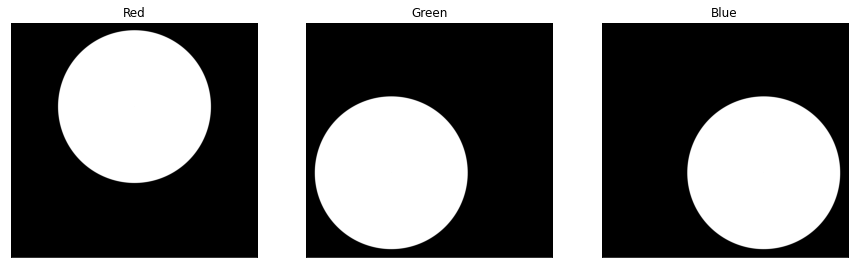

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(131),plt.imshow(r, cmap = 'gray')
plt.title('Red'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(g, cmap = 'gray')
plt.title('Green'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(b, cmap = 'gray')
plt.title('Blue'), plt.xticks([]), plt.yticks([])
plt.show()

Vemos que essa representação "separa" os 3 circulos que formam a figura na imagem nos 3 canais respectivos às cores dos círculos. Podemos entender que podemos formar uma imagem colorida com a captura de 3 lentes monocromáticas nas cores vermelho, verde e azul e realizar a composição, fazendo o processo apresentado de forma invertida.

Podemos converter a imagem em RGB para HSI, HSV, CMYK e etc..

Abaixo temos a função de conversão de RGB para HSI, não disponível na biblioteca OPENCV.

In [56]:
def rgb_to_hsi(img):
  with np.errstate(divide='ignore', invalid='ignore'):
    rgb=cv.imread(img)

    hsi=np.zeros((rgb.shape))

    for l in range (rgb.shape[0]):
      for c in range (rgb.shape[1]):
        b = np.int32(rgb[l][c][0])
        g = np.int32(rgb[l][c][1])
        r = np.int32(rgb[l][c][2])
        soma=b+g+r
        I = (soma)/3

        b,g,r= b/soma, g/soma, r/soma
        
        S = 100*(1-3*min(b,g,r))
        h=np.arccos((1/2 * ((r-g) + (r - b)))/(np.sqrt(((r - g) * (r - g)) + ((r - b) * (g - b)))))
        if (b>g):
          h=2*np.pi - h
#        S=100*S

        h=180*h/np.pi
        
        hsi[l][c][0]= h
        hsi[l][c][1]= S
        hsi[l][c][2]= I
        
  return hsi


In [85]:
hsi_img=rgb_to_hsi("lena.png")

Componentes da imagem em HSI:

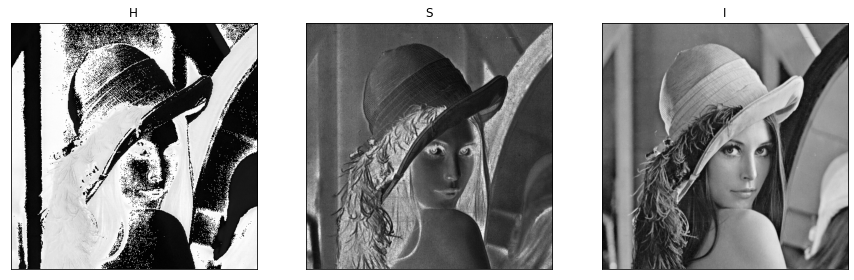

In [86]:
plt.figure(figsize=(15,8))
plt.subplot(131),plt.imshow(hsi_img[:,:,0], cmap = 'gray')
plt.title('H'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsi_img[:,:,1], cmap = 'gray')
plt.title('S'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(hsi_img[:,:,2], cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.show()

In [58]:
hsv_img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2HSV)

Componentes da imagem em HSV, obtidas através da função do OPENCV:

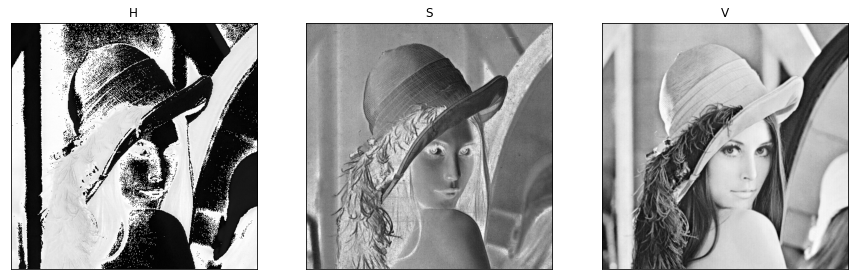

In [59]:
plt.figure(figsize=(15,8))
plt.subplot(131),plt.imshow(hsv_img[:,:,0], cmap = 'gray')
plt.title('H'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img[:,:,1], cmap = 'gray')
plt.title('S'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(hsv_img[:,:,2], cmap = 'gray')
plt.title('V'), plt.xticks([]), plt.yticks([])
plt.show()

Agora iremos realizar a equalização da imagem colorida. Faremos esse processamento utilizando 2 abordagens.
Primeiramente vamos equalizar o canal "V" do formato HSV e depois o mesmo procedimento será feito nos 3 canais da imagem RGB.

In [87]:
v=cv.equalizeHist(hsv_img[:,:,2])

Comparação do resultado da equalização do canal "V" com o "original":

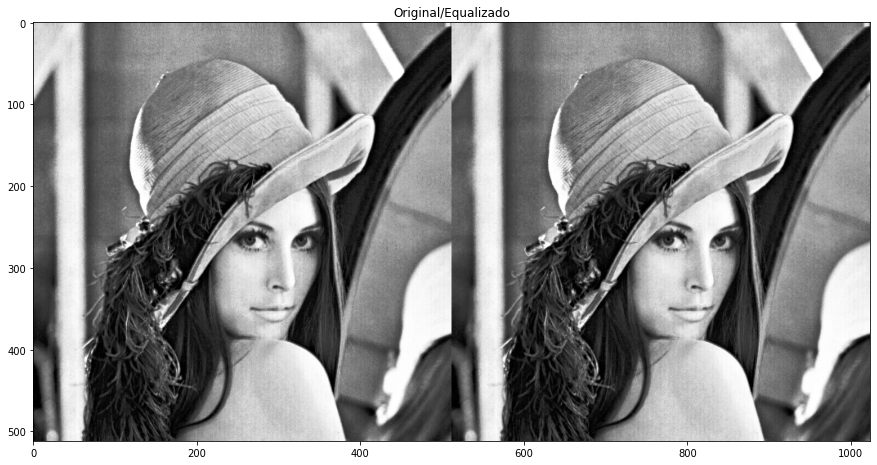

In [89]:
plt.figure(figsize=(15,8))
plt.imshow(np.hstack((hsv_img[:,:,2],v)),cmap='gray')
plt.title('Original/Equalizado')
plt.show()

In [63]:
hsv_img[:,:,2]=v
eq_img=cv.merge([hsv_img])
eq_img=cv.cvtColor(eq_img, cv.COLOR_HSV2BGR)
b,g,r=cv.split(eq_img)
eq_img = cv.merge([r,g,b])

Imagem Lena colorida equalizada no canal "Value" da imagem no formato HSV


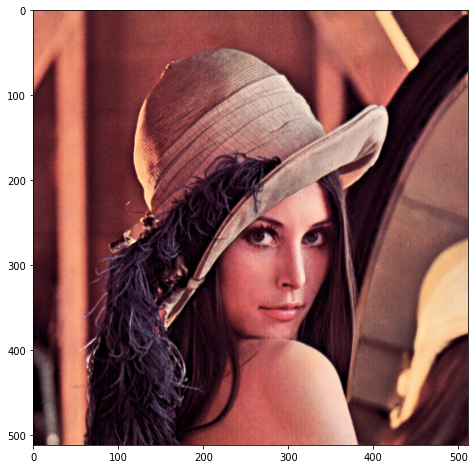

In [75]:
plt.figure(figsize=(15,8))
plt.imshow(eq_img)
plt.show()

In [65]:
lena=cv.imread('lena.png')
b,g,r=cv.split(lena)
b,g,r=cv.equalizeHist(b),cv.equalizeHist(g),cv.equalizeHist(r)
lena_rgb_eq = cv.merge([r,g,b])

Imagem Lena colorida equalizada nos 3 canais do formato RGB. É possível notar que os tons das cores mudaram.

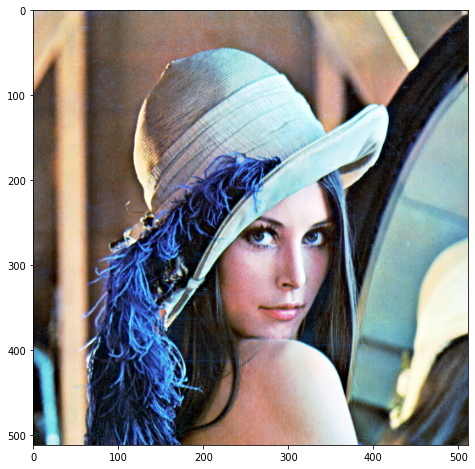

In [74]:
plt.figure(figsize=(15,8))
plt.imshow(lena_rgb_eq)
plt.show()

In [12]:
hsv_img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2HSV)

Aplicação do filtro da média, com máscara 5x5, no canal "V" da imagem HSV.

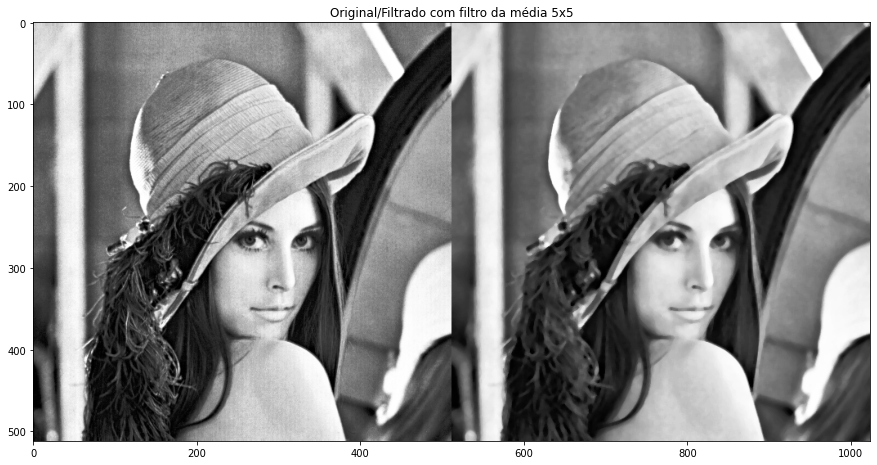

In [90]:
v=cv.medianBlur(np.float32(hsv_img[:,:,2]), 5)
plt.figure(figsize=(15,8))
plt.imshow(np.hstack((hsv_img[:,:,2],v)),cmap='gray')
plt.title('Original/Filtrado com filtro da média 5x5')
plt.show()

In [22]:
hsv_img[:,:,2]=v
mean_img=cv.merge([hsv_img])
mean_img=cv.cvtColor(mean_img, cv.COLOR_HSV2BGR)
b,g,r=cv.split(mean_img)
mean_img = cv.merge([r,g,b])

In [52]:
lena_cv=cv.imread("lena.png")
b,g,r=cv.split(lena_cv)
lena_cv = cv.merge([r,g,b])

Resultado da aplicação do filtro da média supracitado na composição da imagem colorida.

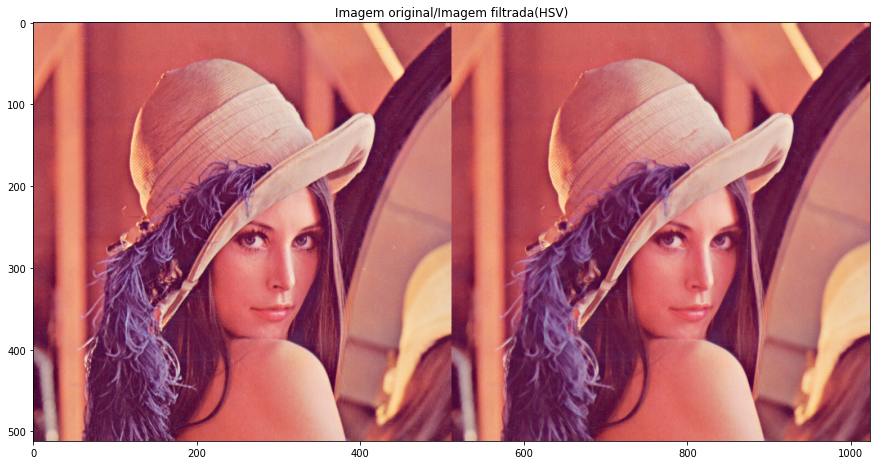

In [77]:
plt.figure(figsize=(15,8))
plt.title('Imagem original/Imagem filtrada(HSV)')
plt.imshow(np.hstack((lena_cv,mean_img)))
plt.show()

Agora vamos aplicar o mesmo filtro da média nos 3 canais RGB da imagem:

In [36]:
lena=cv.imread('lena.png')
b,g,r=cv.split(lena)
b=cv.medianBlur(b, 5)
g=cv.medianBlur(g, 5)
r=cv.medianBlur(r, 5)
lena_rgb_mean = cv.merge([r,g,b])

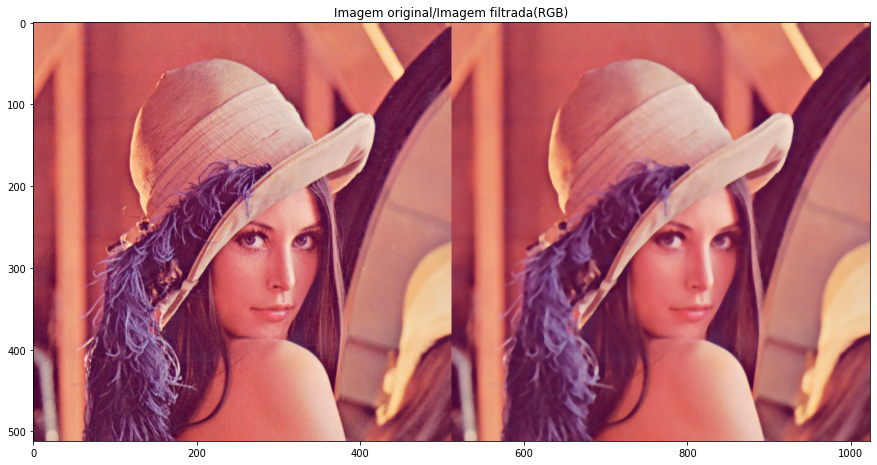

In [78]:
plt.figure(figsize=(15,8))
plt.title('Imagem original/Imagem filtrada(RGB)')
plt.imshow(np.hstack((lena_cv,lena_rgb_mean)))
plt.show()

Podemos comparar o resultado das filtragens em RGB e no canal "V" do HSV.

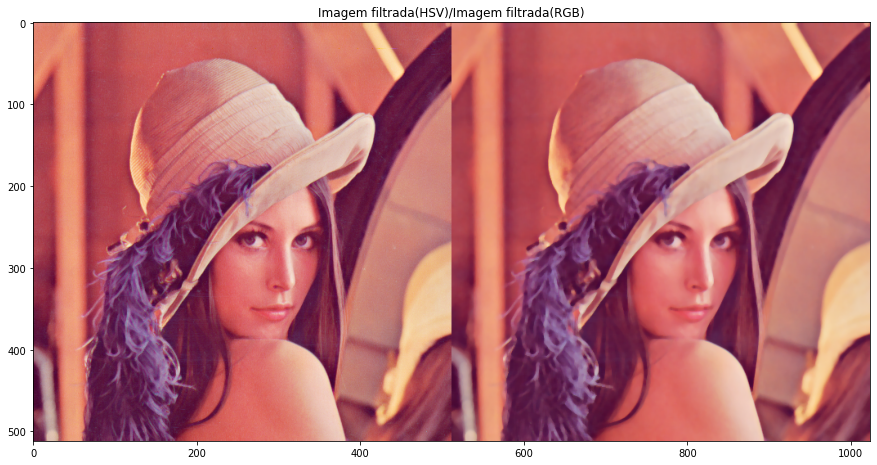

In [79]:
plt.figure(figsize=(15,8))
plt.title('Imagem filtrada(HSV)/Imagem filtrada(RGB)')
plt.imshow(np.hstack((mean_img,lena_rgb_mean)))
plt.show()